In [1]:
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('C:\\Users\\Астемир\\Desktop\\ML\\Courses\\coursera\\week6\\data\\fashion-mnist_train.csv')
test_df = pd.read_csv('C:\\Users\\Астемир\\Desktop\\ML\\Courses\\coursera\\week6\\data\\fashion-mnist_test.csv')

In [4]:
y_train = keras.utils.to_categorical(train_df['label'])
y_test = keras.utils.to_categorical(test_df['label'])

X_train = train_df.drop("label", axis=1).values / 255.0
X_test = test_df.drop("label", axis=1).values /255.0

In [5]:
lr = Sequential()
lr.add(Dense(
    y_train.shape[1], 
    activation='softmax', 
    input_shape=(X_train.shape[1],)
))

lr.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
EPOCHS = 1000

In [7]:

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = lr.fit(X_train, y_train, validation_split=0.1, 
                    epochs=EPOCHS, callbacks=[callback], verbose=1)

Epoch 1/1000
1688/1688 [==============================] - 10s 5ms/step - loss: 0.8036 - accuracy: 0.7300 - val_loss: 0.5103 - val_accuracy: 0.8283
Epoch 2/1000
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4787 - accuracy: 0.8371 - val_loss: 0.4730 - val_accuracy: 0.8410
Epoch 3/1000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4476 - accuracy: 0.8474 - val_loss: 0.4570 - val_accuracy: 0.8447
Epoch 4/1000
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4288 - accuracy: 0.8511 - val_loss: 0.4439 - val_accuracy: 0.8498
Epoch 5/1000
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4168 - accuracy: 0.8555 - val_loss: 0.4439 - val_accuracy: 0.8452
Epoch 6/1000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4095 - accuracy: 0.8591 - val_loss: 0.4555 - val_accuracy: 0.8423
Epoch 7/1000
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4068 - accuracy: 0.8577 - val_loss: 0.4393 

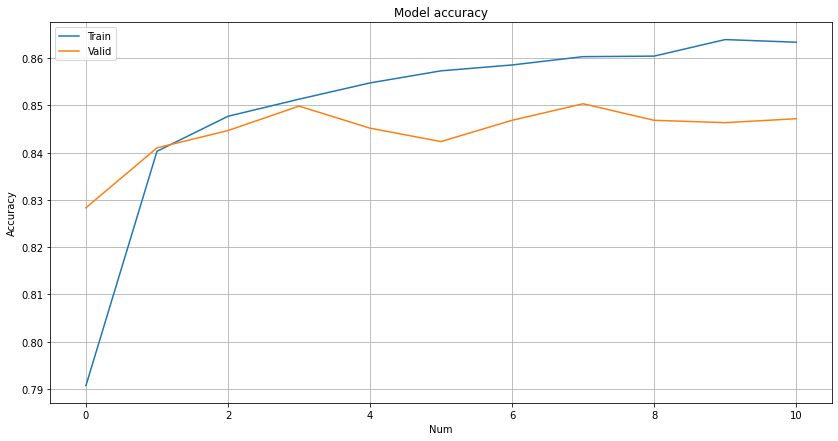

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

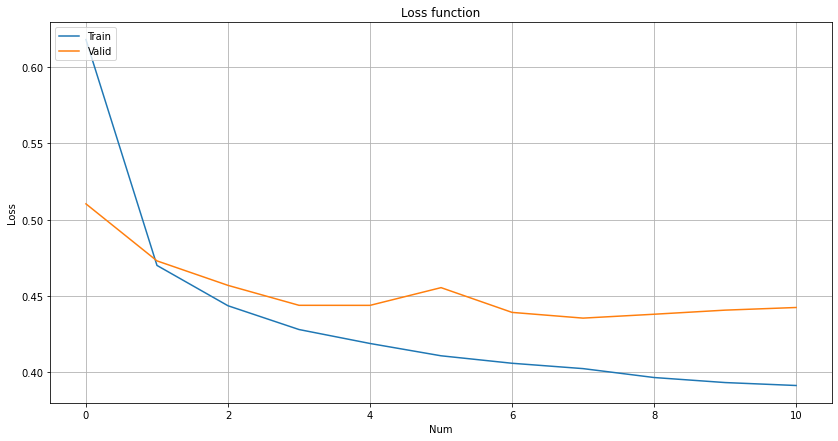

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

In [10]:
scores = lr.evaluate(X_test, y_test, verbose = 0)
lr_loss = scores[0]
lr_acc = scores[1]
print("%s: %.3f%%" % (lr.metrics_names[0], scores[0])) 
print("%s: %.2f%%" % (lr.metrics_names[1], scores[1]*100)) 

loss: 0.430%
accuracy: 85.57%


# Многослойный персептрон

In [11]:
model = Sequential()

model.add(Dense(
    512, 
    activation='relu', 
    input_shape=(X_train.shape[1],)
))

model.add(Dropout(0.3))

model.add(Dense(
    256, 
    activation='relu'
))

model.add(Dropout(0.3))

model.add(Dense(
    128, 
    activation='relu'
))

model.add(Dense(
    y_train.shape[1], 
    activation='softmax', 
    input_shape=(X_train.shape[1],)
))

model.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
________________________________________________

In [12]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, validation_split=0.1, 
                    epochs=EPOCHS, callbacks=[callback], verbose=1)

Epoch 1/1000
1688/1688 [==============================] - 35s 19ms/step - loss: 0.7286 - accuracy: 0.7301 - val_loss: 0.4374 - val_accuracy: 0.8513
Epoch 2/1000
1688/1688 [==============================] - 33s 19ms/step - loss: 0.4369 - accuracy: 0.8419 - val_loss: 0.3910 - val_accuracy: 0.8592
Epoch 3/1000
1688/1688 [==============================] - 33s 19ms/step - loss: 0.4039 - accuracy: 0.8553 - val_loss: 0.3740 - val_accuracy: 0.8633
Epoch 4/1000
1688/1688 [==============================] - 37s 22ms/step - loss: 0.3841 - accuracy: 0.8594 - val_loss: 0.3766 - val_accuracy: 0.8610
Epoch 5/1000
1688/1688 [==============================] - 38s 23ms/step - loss: 0.3635 - accuracy: 0.8680 - val_loss: 0.3517 - val_accuracy: 0.8708
Epoch 6/1000
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3536 - accuracy: 0.8688 - val_loss: 0.3390 - val_accuracy: 0.8787
Epoch 7/1000
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3388 - accuracy: 0.8781 - val_

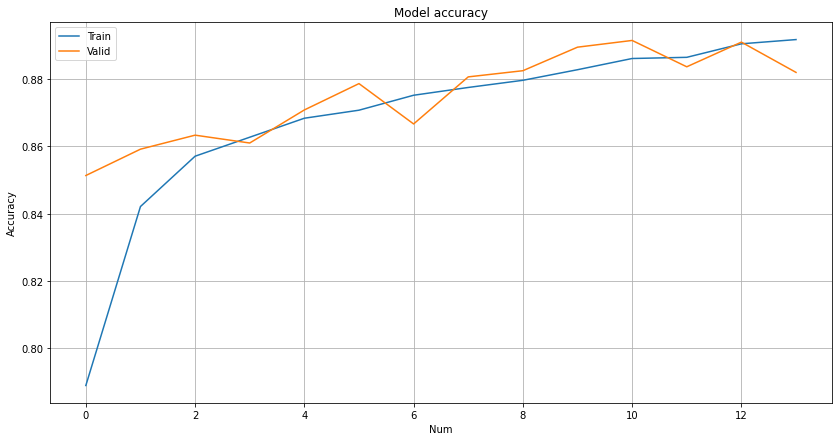

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

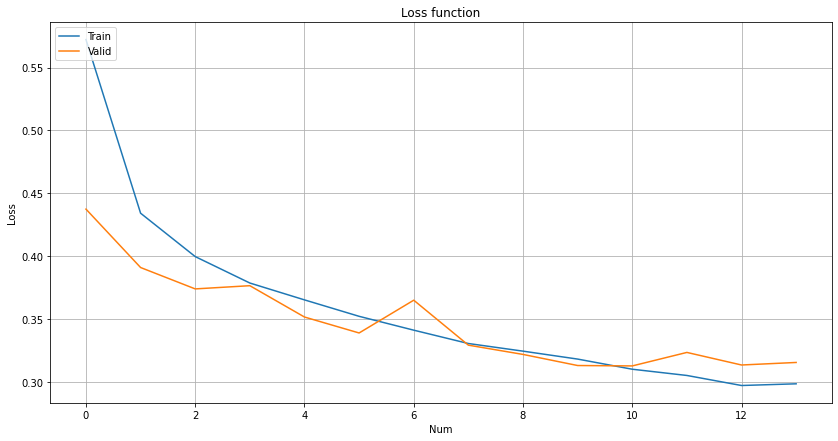

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

In [15]:
scores = model.evaluate(X_test, y_test, verbose = 0)
ann_loss = scores[0]
ann_acc = scores[1]
print("%s: %.3f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.308
accuracy: 88.57%


### Увеличение числа параметров привело к улучшению качетсва работы сети


### CNN1

Преобразуем входные данные для CNN

In [19]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

In [22]:
model_cnn = Sequential()
model_cnn.add(Input(shape=X_train.shape[1:]))
model_cnn.add(Convolution2D(32, 5, activation="relu"))
model_cnn.add(MaxPooling2D())
model_cnn.add(Convolution2D(64, 3, activation="relu"))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation="relu"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(128, activation="relu"))
model_cnn.add(Dense(y_train.shape[1], activation='softmax'))

model_cnn.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               1638656   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [23]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_cnn.fit(X_train, y_train, validation_split=0.1, 
                    epochs=EPOCHS, callbacks=[callback], verbose=1)

Epoch 1/1000
1688/1688 [==============================] - 180s 106ms/step - loss: 0.6340 - accuracy: 0.7662 - val_loss: 0.3284 - val_accuracy: 0.8812
Epoch 2/1000
1688/1688 [==============================] - 173s 102ms/step - loss: 0.3120 - accuracy: 0.8864 - val_loss: 0.2798 - val_accuracy: 0.8992
Epoch 3/1000
1688/1688 [==============================] - 188s 111ms/step - loss: 0.2586 - accuracy: 0.9051 - val_loss: 0.2695 - val_accuracy: 0.9000
Epoch 4/1000
1688/1688 [==============================] - 178s 106ms/step - loss: 0.2252 - accuracy: 0.9148 - val_loss: 0.2491 - val_accuracy: 0.9068
Epoch 5/1000
1688/1688 [==============================] - 188s 111ms/step - loss: 0.1946 - accuracy: 0.9255 - val_loss: 0.2473 - val_accuracy: 0.9107
Epoch 6/1000
1688/1688 [==============================] - 197s 117ms/step - loss: 0.1725 - accuracy: 0.9343 - val_loss: 0.2708 - val_accuracy: 0.9115
Epoch 7/1000
1688/1688 [==============================] - 187s 111ms/step - loss: 0.1540 - accuracy:

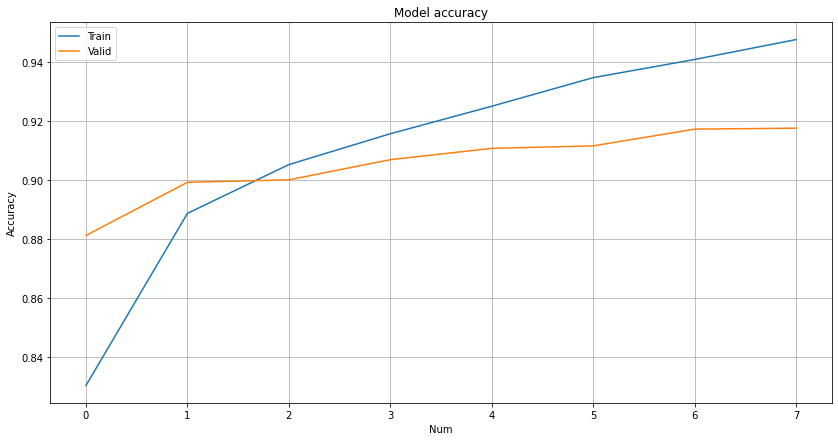

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

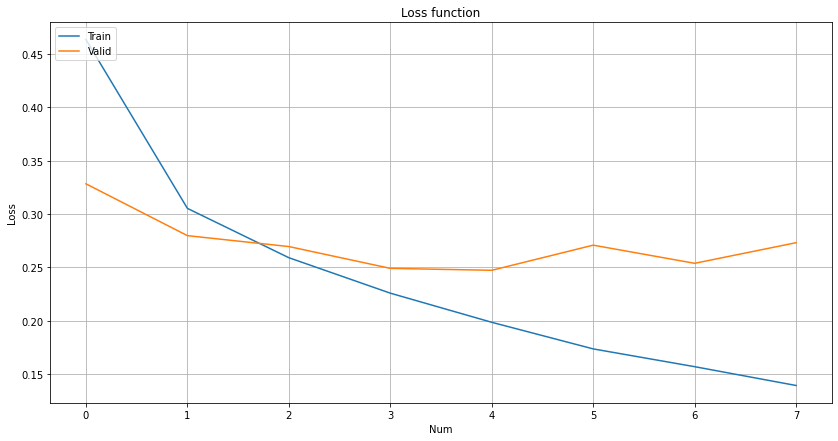

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

In [26]:
scores = model_cnn.evaluate(X_test, y_test, verbose = 0)
cnn_loss = scores[0]
cnn_acc = scores[1]
print("%s: %.3f" % (model_cnn.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model_cnn.metrics_names[1], scores[1]*100))

loss: 0.252
accuracy: 92.10%


### CNN2

In [27]:
model_cnn2 = Sequential()
model_cnn2.add(Input(shape=X_train.shape[1:]))
model_cnn2.add(Convolution2D(32, 5, activation="relu"))

model_cnn2.add(Convolution2D(32, 3, activation="relu"))

model_cnn2.add(MaxPooling2D())

model_cnn2.add(Convolution2D(48, 3, activation="relu"))

model_cnn2.add(Convolution2D(64, 3, activation="relu"))

model_cnn2.add(Flatten())

model_cnn2.add(Dense(256, activation="relu"))

model_cnn2.add(Dropout(0.3))

model_cnn2.add(Dense(128, activation="relu"))

model_cnn2.add(Dense(y_train.shape[1], activation='softmax'))

model_cnn2.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_cnn2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 48)          13872     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          27712     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

In [28]:

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_cnn2.fit(X_train, y_train, validation_split=0.1, 
                    epochs=EPOCHS, callbacks=[callback], verbose=1)

Epoch 1/1000
1688/1688 [==============================] - 292s 172ms/step - loss: 0.7076 - accuracy: 0.7363 - val_loss: 0.3440 - val_accuracy: 0.8787
Epoch 2/1000
1688/1688 [==============================] - 300s 178ms/step - loss: 0.3370 - accuracy: 0.8770 - val_loss: 0.3171 - val_accuracy: 0.8797
Epoch 3/1000
1688/1688 [==============================] - 294s 174ms/step - loss: 0.2778 - accuracy: 0.8982 - val_loss: 0.2738 - val_accuracy: 0.8965
Epoch 4/1000
1688/1688 [==============================] - 296s 175ms/step - loss: 0.2483 - accuracy: 0.9079 - val_loss: 0.2738 - val_accuracy: 0.9028
Epoch 5/1000
1688/1688 [==============================] - 314s 186ms/step - loss: 0.2270 - accuracy: 0.9167 - val_loss: 0.2771 - val_accuracy: 0.9067
Epoch 6/1000
1688/1688 [==============================] - 296s 175ms/step - loss: 0.1986 - accuracy: 0.9264 - val_loss: 0.2668 - val_accuracy: 0.9098
Epoch 7/1000
1688/1688 [==============================] - 301s 178ms/step - loss: 0.1793 - accuracy:

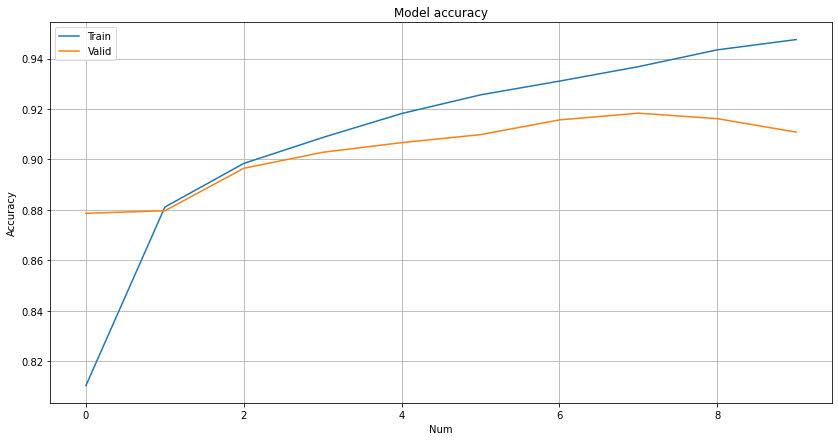

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

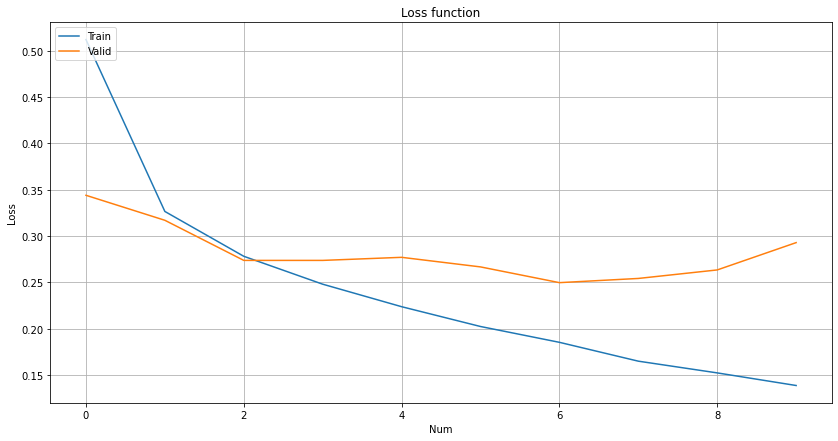

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Num')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid()
plt.show()

In [32]:
scores = model_cnn2.evaluate(X_test, y_test, verbose = 0)
cnn2_loss = scores[0]
cnn2_acc = scores[1]
print("%s: %.3f" % (model_cnn2.metrics_names[0], scores[0])) 
print("%s: %.2f%%" % (model_cnn2.metrics_names[1], scores[1]*100)) 

loss: 0.273
accuracy: 91.37%


Увеличение количества слоёв лишь ухудшило качество модели

### CNN3

In [34]:
model_cnn3 = Sequential()
model_cnn3.add(Input(shape=X_train.shape[1:]))
model_cnn3.add(Convolution2D(32, 5, activation="relu"))

model_cnn3.add(BatchNormalization())

model_cnn3.add(Convolution2D(32, 3, activation="relu"))

model_cnn3.add(MaxPooling2D())

model_cnn3.add(Convolution2D(48, 3, activation="relu"))

model_cnn3.add(BatchNormalization())

model_cnn3.add(Convolution2D(64, 3, activation="relu"))

model_cnn3.add(Flatten())

model_cnn3.add(Dense(256, activation="relu"))

model_cnn3.add(Dropout(0.3))

model_cnn3.add(Dense(128, activation="relu"))

model_cnn3.add(Dense(y_train.shape[1], activation='softmax'))

model_cnn3.compile(    
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_cnn3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 48)          13872     
_________________________________________________________________
batch_normalization_1 (Batch (None, 9, 9, 48)          192       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)         

In [35]:

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model_cnn3.fit(X_train, y_train, validation_split=0.1, 
                    epochs=EPOCHS, callbacks=[callback], verbose=1)

Epoch 1/1000
1688/1688 [==============================] - 345s 203ms/step - loss: 0.6148 - accuracy: 0.7735 - val_loss: 0.3533 - val_accuracy: 0.8712
Epoch 2/1000
1688/1688 [==============================] - 336s 199ms/step - loss: 0.3281 - accuracy: 0.8817 - val_loss: 0.3139 - val_accuracy: 0.8845
Epoch 3/1000
1688/1688 [==============================] - 336s 199ms/step - loss: 0.2757 - accuracy: 0.8993 - val_loss: 0.2994 - val_accuracy: 0.8958
Epoch 4/1000
1688/1688 [==============================] - 341s 202ms/step - loss: 0.2394 - accuracy: 0.9130 - val_loss: 0.2718 - val_accuracy: 0.9132
Epoch 5/1000
1688/1688 [==============================] - 372s 220ms/step - loss: 0.2228 - accuracy: 0.9180 - val_loss: 0.2588 - val_accuracy: 0.9092
Epoch 6/1000
1688/1688 [==============================] - 351s 208ms/step - loss: 0.1887 - accuracy: 0.9301 - val_loss: 0.2598 - val_accuracy: 0.9122
Epoch 7/1000
1688/1688 [==============================] - 352s 208ms/step - loss: 0.1644 - accuracy:

In [36]:
scores = model_cnn3.evaluate(X_test, y_test, verbose = 0)
cnn3_loss = scores[0]
cnn3_acc = scores[1]
print("%s: %.3f" % (model_cnn3.metrics_names[0], scores[0])) 
print("%s: %.2f%%" % (model_cnn3.metrics_names[1], scores[1]*100)) 

loss: 0.243
accuracy: 91.67%


In [38]:
LOSS = [lr_loss, ann_loss, cnn_loss, cnn2_loss, cnn3_loss]
LOSS = [round(i,4) for i in LOSS]
ACC = [lr_acc, ann_acc, cnn_acc, cnn2_acc, cnn3_acc]
ACC = [round(i,4) for i in ACC]
networks = ['LR','ANN','CNN','CNN2','CNN3']
df = pd.DataFrame({'ACC' : ACC, 'LOSS' : LOSS},index = networks)       
df

,ACC,LOSS
LR,0.8557,0.4304
ANN,0.8857,0.3080
CNN,0.9210,0.2516
CNN2,0.9137,0.2727
CNN3,0.9167,0.2429
